In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import datetime
import requests
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from itertools import combinations
from collections import OrderedDict 

%matplotlib inline

/Users/scottlew/miniconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## READ IN MLB STATS FOR 2001-2018 SEASONS 

## Note: No salary data is used for regression in this case.

In [2]:
# read data from csv file for 2001-2018 MLB seasons
df = pd.read_csv('MLB_STATS_2001-2018.csv')

In [3]:
df.head()

,Tm,#Bat,BatAge,R/G,G_x,PA,AB,R_x,H_x,2B,...,BF,ERA+,FIP,WHIP,H9,HR9,BB9,SO9,SO/W,LOB_y
0,ARI,51,28.3,4.51,162,6096,5421,731,1357,293,...,6102,104,4.02,1.286,8.8,1.0,2.8,6.6,2.39,1110
1,ATL,45,28.9,3.96,162,6169,5528,641,1345,244,...,6220,110,3.49,1.252,8.1,0.8,3.2,8.1,2.56,1176
2,BAL,50,28.3,4.37,162,6156,5585,708,1434,273,...,6332,86,4.67,1.454,9.8,1.3,3.3,6.5,1.95,1132
3,BOS,49,30.0,5.40,162,6414,5710,875,1600,352,...,6242,103,4.05,1.308,8.4,1.0,3.3,7.5,2.25,1133
4,CHC,42,29.2,4.04,162,6130,5549,654,1423,285,...,6262,90,4.11,1.408,9.0,1.0,3.6,7.7,2.11,1203


In [4]:
df.shape

(540, 65)

In [5]:
df.tail()

,Tm,#Bat,BatAge,R/G,G_x,PA,AB,R_x,H_x,2B,...,BF,ERA+,FIP,WHIP,H9,HR9,BB9,SO9,SO/W,LOB_y
535,STL,42,28.8,4.54,162,6241,5542,736,1456,285,...,6137,109,3.85,1.299,8.7,0.8,3.0,6.8,2.29,1135
536,TBR,37,27.5,4.95,162,6270,5439,802,1343,295,...,6103,103,4.09,1.255,8.3,1.1,3.0,7.4,2.49,1093
537,TEX,48,28.3,4.86,162,6302,5635,787,1556,268,...,6213,114,4.17,1.310,8.4,1.0,3.4,7.3,2.14,1160
538,TOR,44,29.3,4.66,162,6072,5495,755,1364,319,...,6165,100,4.04,1.351,8.8,0.9,3.4,7.4,2.20,1115
539,WSN,46,29.1,4.04,162,6100,5418,655,1355,250,...,6214,98,4.12,1.380,9.2,0.9,3.2,6.7,2.09,1167


In [6]:
df.dtypes

Tm         object
#Bat        int64
BatAge    float64
R/G       float64
G_x         int64
PA          int64
AB          int64
R_x         int64
H_x         int64
2B          int64
3B          int64
HR_x        int64
RBI         int64
SB          int64
CS          int64
BB_x        int64
SO_x        int64
BA        float64
OBP       float64
SLG       float64
OPS       float64
OPS+        int64
TB          int64
GDP         int64
HBP_x       int64
SH          int64
SF          int64
IBB_x       int64
LOB_x       int64
Year        int64
           ...   
W-L%      float64
ERA       float64
G_y         int64
GS          int64
GF          int64
CG          int64
tSho        int64
cSho        int64
SV          int64
IP        float64
H_y         int64
R_y         int64
ER          int64
HR_y        int64
BB_y        int64
IBB_y       int64
SO_y        int64
HBP_y       int64
BK          int64
WP          int64
BF          int64
ERA+        int64
FIP       float64
WHIP      float64
H9        

In [7]:
df.columns

Index(['Tm', '#Bat', 'BatAge', 'R/G', 'G_x', 'PA', 'AB', 'R_x', 'H_x', '2B',
       '3B', 'HR_x', 'RBI', 'SB', 'CS', 'BB_x', 'SO_x', 'BA', 'OBP', 'SLG',
       'OPS', 'OPS+', 'TB', 'GDP', 'HBP_x', 'SH', 'SF', 'IBB_x', 'LOB_x',
       'Year', '#P', 'PAge', 'RA/G', 'W', 'L', 'W-L%', 'ERA', 'G_y', 'GS',
       'GF', 'CG', 'tSho', 'cSho', 'SV', 'IP', 'H_y', 'R_y', 'ER', 'HR_y',
       'BB_y', 'IBB_y', 'SO_y', 'HBP_y', 'BK', 'WP', 'BF', 'ERA+', 'FIP',
       'WHIP', 'H9', 'HR9', 'BB9', 'SO9', 'SO/W', 'LOB_y'],
      dtype='object')

In [8]:
df.Year.value_counts()

2018    30
2017    30
2002    30
2003    30
2004    30
2005    30
2006    30
2007    30
2008    30
2009    30
2010    30
2011    30
2012    30
2013    30
2014    30
2015    30
2016    30
2001    30
Name: Year, dtype: int64

In [9]:
correlation = df.corr()

In [10]:
W_corr = correlation.W
W_corr

#Bat     -0.357100
BatAge    0.299576
R/G       0.555701
G_x       0.115518
PA        0.422754
AB        0.186805
R_x       0.556681
H_x       0.354050
2B        0.274697
3B       -0.074794
HR_x      0.381635
RBI       0.556678
SB        0.041973
CS       -0.129402
BB_x      0.437243
SO_x     -0.132904
BA        0.379340
OBP       0.521827
SLG       0.479715
OPS       0.524375
OPS+      0.608675
TB        0.457988
GDP       0.052854
HBP_x     0.156519
SH       -0.052630
SF        0.306050
IBB_x     0.305225
LOB_x     0.285357
Year      0.001888
#P       -0.290365
            ...   
W-L%      0.999887
ERA      -0.665668
G_y       0.115518
GS        0.115518
GF       -0.153824
CG        0.166163
tSho      0.477444
cSho      0.243888
SV        0.650027
IP        0.494510
H_y      -0.552952
R_y      -0.670395
ER       -0.653687
HR_y     -0.377776
BB_y     -0.473831
IBB_y    -0.235755
SO_y      0.338786
HBP_y    -0.147388
BK       -0.204375
WP       -0.204249
BF       -0.521027
ERA+      0.

In [11]:
#df.SV.isna().sum()
df.isnull().sum()

Tm        0
#Bat      0
BatAge    0
R/G       0
G_x       0
PA        0
AB        0
R_x       0
H_x       0
2B        0
3B        0
HR_x      0
RBI       0
SB        0
CS        0
BB_x      0
SO_x      0
BA        0
OBP       0
SLG       0
OPS       0
OPS+      0
TB        0
GDP       0
HBP_x     0
SH        0
SF        0
IBB_x     0
LOB_x     0
Year      0
         ..
W-L%      0
ERA       0
G_y       0
GS        0
GF        0
CG        0
tSho      0
cSho      0
SV        0
IP        0
H_y       0
R_y       0
ER        0
HR_y      0
BB_y      0
IBB_y     0
SO_y      0
HBP_y     0
BK        0
WP        0
BF        0
ERA+      0
FIP       0
WHIP      0
H9        0
HR9       0
BB9       0
SO9       0
SO/W      0
LOB_y     0
Length: 65, dtype: int64

In [12]:
df.columns

Index(['Tm', '#Bat', 'BatAge', 'R/G', 'G_x', 'PA', 'AB', 'R_x', 'H_x', '2B',
       '3B', 'HR_x', 'RBI', 'SB', 'CS', 'BB_x', 'SO_x', 'BA', 'OBP', 'SLG',
       'OPS', 'OPS+', 'TB', 'GDP', 'HBP_x', 'SH', 'SF', 'IBB_x', 'LOB_x',
       'Year', '#P', 'PAge', 'RA/G', 'W', 'L', 'W-L%', 'ERA', 'G_y', 'GS',
       'GF', 'CG', 'tSho', 'cSho', 'SV', 'IP', 'H_y', 'R_y', 'ER', 'HR_y',
       'BB_y', 'IBB_y', 'SO_y', 'HBP_y', 'BK', 'WP', 'BF', 'ERA+', 'FIP',
       'WHIP', 'H9', 'HR9', 'BB9', 'SO9', 'SO/W', 'LOB_y'],
      dtype='object')

# Split the data into training & test sets.

In [13]:
y = df.W
#y

## Linear Regression with scikit learn model

In [14]:
# create training and testing vars
predictors = ['ERA','SO_y','SV','SLG','OBP','BA','SO_x']
X = df[predictors]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state =42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(432, 7) (432,)
(108, 7) (108,)


In [15]:
# fit a model
lm = LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

In [16]:
print("The Trainng Score For Model 1:")
print(lm.score(X_train,y_train))
print()
print("The Test Score For Model 1:")
print(lm.score(X_test,y_test))
print()
print(model.coef_)

The Trainng Score For Model 1:
0.893446074857

The Test Score For Model 1:
0.904775798443

[ -1.34967016e+01   4.21126738e-03   3.87504418e-01   1.66250834e+02
   2.32224034e+02  -1.23717763e+01  -2.64106449e-03]


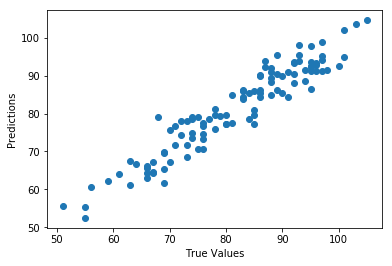

In [17]:
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')

In [18]:
pred_tr = lm.predict(X_train)
rmse_train = np.sqrt(mean_squared_error(y_train,pred_tr))
print('For Linear Regression Model 1:')
print("Root Mean Squared Error Train: {}".format(rmse_train))
print()
rmse_test = np.sqrt(mean_squared_error(y_test,predictions))
print("Root Mean Squared Error Test: {}".format(rmse_test))
print()

For Linear Regression Model 1:
Root Mean Squared Error Train: 3.752101249855971

Root Mean Squared Error Test: 3.7415011921091037



## LINEAR REGRESSION WITH STATSMODEL

In [19]:
predictors = ['ERA','25-Man','SV','SLG','OBP','BA','SO_x']

In [20]:
model = sm.OLS(y_train, X_train)
results = model.fit()
print('statsmodel 1')
print(results.summary())

statsmodel 1
                            OLS Regression Results                            
Dep. Variable:                      W   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 2.811e+04
Date:                Thu, 30 May 2019   Prob (F-statistic):               0.00
Time:                        13:13:44   Log-Likelihood:                -1188.6
No. Observations:                 432   AIC:                             2391.
Df Residuals:                     425   BIC:                             2420.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ERA          -14.0168      0.486    -28

In [21]:
resid = results.resid

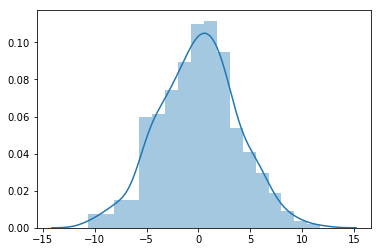

In [22]:
sns.distplot(resid)

## MODEL 2 WITH FEWER PREDICTORS: 'ERA','SO_x','SV','OBP'

In [23]:
predictors = ['ERA','SO_x','SV','OBP']
X = df[predictors]
y = df.W
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state =42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(432, 4) (432,)
(108, 4) (108,)


In [24]:
#X_train

In [25]:
#X_test

## scikit learn model

In [26]:
# fit a model
lm2 = LinearRegression()
model2 = lm2.fit(X_train, y_train)
pred2_ts = lm2.predict(X_test)

In [27]:
print("The Training Score For Model 2:")
print(lm2.score(X_train,y_train))
print()
print("The Test Score For Model 2:")
print(lm2.score(X_test,y_test))
print()
print(model2.coef_)

The Training Score For Model 2:
0.838157011406

The Test Score For Model 2:
0.868170240167

[ -1.26160213e+01   4.93356248e-03   4.49579647e-01   4.65030054e+02]


In [28]:
pred_tr2 = lm2.predict(X_train)
predictions2 = lm2.predict(X_test)
rmse_train = np.sqrt(mean_squared_error(y_train,pred_tr2))
print("Root Mean Squared Error for model 2 Train: {}".format(rmse_train))
print()
rmse_test = np.sqrt(mean_squared_error(y_test,predictions2))
print("Root Mean Squared Error for model 2 Test: {}".format(rmse_test))
print()

Root Mean Squared Error for model 2 Train: 4.62420168622596

Root Mean Squared Error for model 2 Test: 4.402293043303214



## LINEAR REGRESSION WITH STATSMODEL

In [29]:
sm_model2 = sm.OLS(y_train, X_train)
results2 = sm_model2.fit()
print('statsmodel Model 2')
print(results2.summary())

statsmodel Model 2
                            OLS Regression Results                            
Dep. Variable:                      W   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 3.085e+04
Date:                Thu, 30 May 2019   Prob (F-statistic):               0.00
Time:                        13:13:45   Log-Likelihood:                -1290.7
No. Observations:                 432   AIC:                             2589.
Df Residuals:                     428   BIC:                             2606.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ERA          -13.5411      0.508 

In [30]:
#########################################################################################

## Model 3 with 4 Predictors: 'ERA','SV','SLG','OBP'

In [31]:
predictors = ['ERA','OBP','SV','SLG']
X = df[predictors]
y = df.W
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state =42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(432, 4) (432,)
(108, 4) (108,)


In [32]:
# fit a model
lm3= LinearRegression()
model3= lm3.fit(X_train, y_train)
#odel3= lm3fit(X_train, y_train)
pred3_test = lm3.predict(X_test)
#red3ts = lm3predict(X_test)

# evaluate & print scores for training & test data set
# fit a model
print("The Training Score For Model 3:")
print(lm3.score(X_train, y_train))
print()
print("The Test Score For Model 3:")
print(lm3.score(X_test, y_test))
print()
print(model3.coef_)


The Training Score For Model 3:
0.891840659112

The Test Score For Model 3:
0.904865764709

[ -14.16234036  225.04330184    0.38330429  168.0219529 ]


In [33]:
pred_tr3 = lm3.predict(X_train)
predictions3 = lm3.predict(X_test)
rmse_train = np.sqrt(mean_squared_error(y_train,pred_tr3))
print("Root Mean train Squared Error for model 3 Train: {}".format(rmse_train))
print()
rmse_test = np.sqrt(mean_squared_error(y_test,predictions3))
print("Root Mean test Squared Error for model 3 Test: {}".format(rmse_test))
print()

Root Mean train Squared Error for model 3 Train: 3.7802614630948876

Root Mean test Squared Error for model 3 Test: 3.7397333199140577



## Statsmodel Linear Regression

In [34]:
sm_model3 = sm.OLS(y_train, X_train)
results3 = sm_model3.fit()
print('statsmodel Model 3')
print(results3.summary())

statsmodel Model 3
                            OLS Regression Results                            
Dep. Variable:                      W   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 4.819e+04
Date:                Thu, 30 May 2019   Prob (F-statistic):               0.00
Time:                        13:13:45   Log-Likelihood:                -1194.6
No. Observations:                 432   AIC:                             2397.
Df Residuals:                     428   BIC:                             2414.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ERA          -14.7898      0.406 

In [35]:
######################################################################################

In [36]:
#standardScalerX = StandardScaler()
#x = standardScalerX.fit_transform(X)

In [37]:
df.head(3)

,Tm,#Bat,BatAge,R/G,G_x,PA,AB,R_x,H_x,2B,...,BF,ERA+,FIP,WHIP,H9,HR9,BB9,SO9,SO/W,LOB_y
0,ARI,51,28.3,4.51,162,6096,5421,731,1357,293,...,6102,104,4.02,1.286,8.8,1.0,2.8,6.6,2.39,1110
1,ATL,45,28.9,3.96,162,6169,5528,641,1345,244,...,6220,110,3.49,1.252,8.1,0.8,3.2,8.1,2.56,1176
2,BAL,50,28.3,4.37,162,6156,5585,708,1434,273,...,6332,86,4.67,1.454,9.8,1.3,3.3,6.5,1.95,1132


## Random Forest Regression

In [38]:
y = df.W
#X = df.drop(["W","Tm","Suspended"], axis=1)
predictors = ['ERA','SO_y','SV','SLG','OBP','BA']
X = df[predictors]

In [39]:
X.head(3)

,ERA,SO_y,SV,SLG,OBP,BA
0,3.80,1058,58,0.413,0.322,0.250
1,3.48,1332,52,0.387,0.308,0.243
2,4.89,1044,32,0.413,0.316,0.257


In [40]:
#X.columns

In [41]:
#y

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state =42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(432, 6) (432,)
(108, 6) (108,)


In [43]:
sc = StandardScaler()  
X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test)  

In [44]:
# n_estimators refers to the number of trees in the random forest
regressor = RandomForestRegressor(n_estimators=20, random_state=0)  
regressor.fit(X_train, y_train)  
y_pred = regressor.predict(X_test)  

In [45]:
y_pred

array([  91.  ,   94.4 ,   76.3 ,   88.85,   72.05,   70.35,   58.  ,
         94.2 ,   89.15,   70.85,   80.9 ,   63.25,   85.1 ,   81.25,
         94.1 ,   86.95,   95.25,   86.1 ,   89.35,   92.85,   91.85,
         66.55,   72.  ,   93.7 ,   63.4 ,   67.5 ,   92.95,   66.3 ,
         75.45,   86.65,   91.1 ,   82.4 ,   85.15,   87.3 ,   87.65,
         76.25,   74.35,   80.25,   78.5 ,   75.9 ,   86.  ,   88.85,
         65.05,   74.85,   86.45,   92.05,   76.35,   78.15,   68.2 ,
         85.35,   82.7 ,   89.35,   73.05,   91.6 ,   92.05,   92.45,
         77.2 ,   69.4 ,   84.55,   78.45,   82.15,   86.75,   66.7 ,
         87.65,   55.35,   74.05,   77.15,   67.75,   89.3 ,   81.7 ,
         78.  ,   88.75,   93.55,   75.55,   69.9 ,   64.9 ,   93.15,
         72.65,   92.05,   71.65,   77.3 ,   70.75,   76.35,   86.5 ,
         89.15,   63.35,   66.05,   77.2 ,  103.9 ,   71.5 ,   87.95,
         95.25,   77.25,   92.05,   83.15,   89.75,   87.25,   94.5 ,
         53.  ,   83

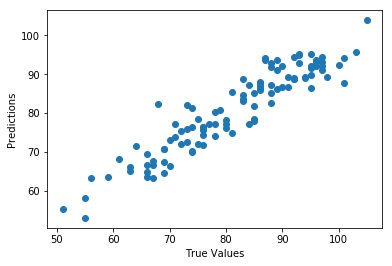

In [46]:
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')

In [47]:
# print mean squared error for training and test data
mse_train = mean_squared_error(y_train, regressor.predict(X_train))
rmse_train = np.sqrt(mse_train)
print('Random Forest Regressor Model 1')
print(" root mean squared train error RMSE: %.4f" % rmse_train)
mse_test = mean_squared_error(y_test,regressor.predict(X_test))
rmse_test = np.sqrt(mse_test)
print(" root mean squared test error RMSE: %.4f" % rmse_test)

Random Forest Regressor Model 1
 root mean squared train error RMSE: 1.9667
 root mean squared test error RMSE: 4.4043


In [48]:
print("The Training Score For Random Forest Regressor Model 1:")
print(regressor.score(X_train, y_train))
print()
print("The Test Score For Random Forest Regressor Model 1:")
print(regressor.score(X_test, y_test))
print()

The Training Score For Random Forest Regressor Model 1:
0.97072404251

The Test Score For Random Forest Regressor Model 1:
0.86804835789



In [49]:
# regressor with fewer predictors
y = df.W
#predictors = ['ERA','25-Man','SV','OBP']
predictors = ['ERA','SO_y','SV','SLG']
X = df[predictors]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state =42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

sc = StandardScaler()  
X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test)  

(432, 4) (432,)
(108, 4) (108,)


In [50]:
regressor2 = RandomForestRegressor(n_estimators=10, random_state=0)  
regressor2.fit(X_train, y_train)  
y_pred2 = regressor2.predict(X_test)

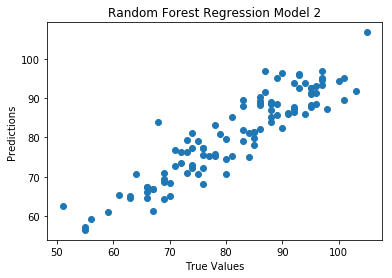

In [51]:
plt.scatter(y_test, y_pred2)
plt.title('Random Forest Regression Model 2')
plt.xlabel('True Values')
plt.ylabel('Predictions')

In [52]:
# print mean squared error for training and test data
mse_train = mean_squared_error(y_train, regressor2.predict(X_train))
rmse_train = np.sqrt(mse_train)
print('Random Forest Regressor Model 2')
print(" root mean squared train error RMSE: %.4f" % rmse_train)
mse_test = mean_squared_error(y_test,regressor2.predict(X_test))
rmse_test = np.sqrt(mse_test)
print(" root mean squared test error RMSE: %.4f" % rmse_test)

Random Forest Regressor Model 2
 root mean squared train error RMSE: 2.2027
 root mean squared test error RMSE: 4.9146


In [53]:
print("The Training Score For Random Forest Regressor Model 2:")
print(regressor2.score(X_train, y_train))
print()
print("The Test Score For Random Forest Regressor Model 2:")
print(regressor2.score(X_test, y_test))
print()

The Training Score For Random Forest Regressor Model 2:
0.963276992149

The Test Score For Random Forest Regressor Model 2:
0.83570123315



## Gradient Boosting Regression

In [54]:
# define the target variable and the predictors of target
y = df.W
predictors = ['ERA','SV','SLG','OBP','BA']
X = df[predictors]

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state =42)

# scale the data
sc = StandardScaler()  
X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test)

In [55]:
# fit the training data with gradient boosting regressor
#params['n_estimators'] = 

#gradient_boosting_regressor = GradientBoostingRegressor(n_estimators = 200)
gradient_boosting_regressor = GradientBoostingRegressor(n_estimators = 500)
gradient_boosting_regressor.fit(X_train, y_train)
# print mean squared error for training and test data
mse_train = mean_squared_error(y_train, gradient_boosting_regressor.predict(X_train))
rmse_train = np.sqrt(mse_train)
print(" root mean squared train error RMSE: %.4f" % rmse_train)
mse_test = mean_squared_error(y_test, gradient_boosting_regressor.predict(X_test))
rmse_test = np.sqrt(mse_test)
print(" root mean squared test error RMSE: %.4f" % rmse_test)

 root mean squared train error RMSE: 1.1962
 root mean squared test error RMSE: 4.1811


In [56]:
print("The Training Score For the Gradient Boosting Regressor Model 1:")
print(gradient_boosting_regressor.score(X_train, y_train))
print()
print("The Test Score For the Gradient Boosting Regressor Model 1:")
print(gradient_boosting_regressor.score(X_test, y_test))
print()

The Training Score For the Gradient Boosting Regressor Model 1:
0.989169498247

The Test Score For the Gradient Boosting Regressor Model 1:
0.881084785775



## CHECK FOR COLLINEARITY OF PREDICTORS

### A simple way to detect collinearity is to look at the correlation matrix of the predictors. 
### An element of this matrix that is large in absolute value 
### indicates a pair of highly correlated variables, and therefore a collinearity problem

In [57]:
#df2 = df[[ 'OPS+','RBI','ERA+','25-Man','SV']]
#predictors = ['ERA','25-Man','SV','SLG','OBP','BA']
#df2 = df[[ 'OPS+','RBI','ERA','25-Man','SV','SLG']]
df2 = df[['ERA','SO_y','SV','SLG','OBP','BA']]
df2.head()

,ERA,SO_y,SV,SLG,OBP,BA
0,3.80,1058,58,0.413,0.322,0.250
1,3.48,1332,52,0.387,0.308,0.243
2,4.89,1044,32,0.413,0.316,0.257
3,4.20,1213,36,0.461,0.349,0.280
4,4.33,1224,40,0.401,0.314,0.256


In [58]:
df2.corr()

,ERA,SO_y,SV,SLG,OBP,BA
ERA,1.000000,-0.521396,-0.536422,0.186122,0.081984,0.188281
SO_y,-0.521396,1.000000,0.255753,-0.044779,-0.185448,-0.288269
SV,-0.536422,0.255753,1.000000,0.105109,0.094542,0.043282
SLG,0.186122,-0.044779,0.105109,1.000000,0.750685,0.708654
OBP,0.081984,-0.185448,0.094542,0.750685,1.000000,0.838311
BA,0.188281,-0.288269,0.043282,0.708654,0.838311,1.000000


In [59]:
# Based on the above correlation matrix, SV is moderately negatively correlated with ERA
# SLG, OBP & BA are all highly correlated with each other